# Fast.ai

In [11]:
from fastai.vision.all import *


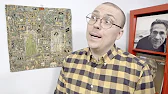

In [12]:
example = "dataset/yellow/_PM2RMx7zTY.jpg"
img = Image.open(example)
img.to_thumb(192)

In [13]:
path = "dataset150"

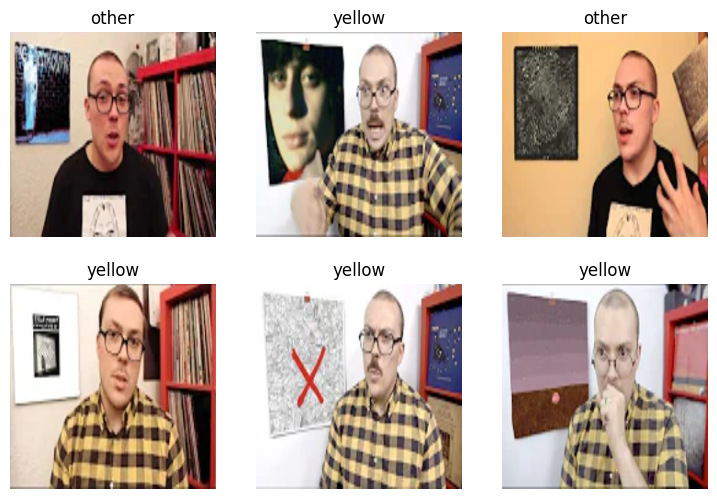

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method=ResizeMethod.Squish)],
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)


In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.860145,0.267065,1.000000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.160760,0.088247,1.000000,00:07
1,0.099012,0.021680,1.000000,00:07
2,0.077968,0.007622,1.000000,00:07
3,0.054950,0.005664,1.000000,00:07
4,0.043839,0.005423,1.000000,00:07


In [31]:
pred, idx, probs = learn.predict(PILImage.create('dataset150/other/-0j4UCWUNr4.jpg'))
print(f"This is: {pred}.")
print(f"Confidence: {probs[idx]:.4f}")



This is: other.
Confidence: 1.0000


In [32]:
pred, idx, probs = learn.predict(PILImage.create('dataset150/yellow/-D5-MKIVzjo.jpg'))
print(f"This is: {pred}.")
print(f"Confidence: {probs[idx]:.4f}")

This is: yellow.
Confidence: 1.0000


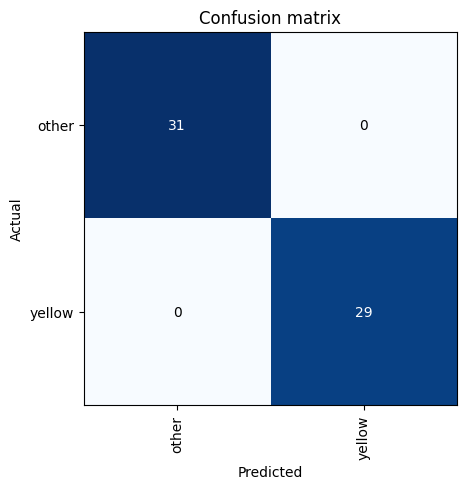

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [24]:
learn.export("fast/export.pkl")

In [27]:
path = Path()
learn_inf = load_learner(path/"fast/export.pkl")


In [28]:
learn_inf.predict("dataset/yellow/_PM2RMx7zTY.jpg")

('yellow', tensor(1), tensor([3.2375e-06, 1.0000e+00]))

In [29]:
learn_inf.predict("dataset/other/-0j4UCWUNr4.jpg")

('other', tensor(0), tensor([1.0000e+00, 2.4705e-06]))